In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from ipywidgets import widgets, interact
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [26]:
reasons_63 = pd.read_csv('../files/เหตุผลของการย้ายถิ่น_63.csv')
reasons_63["Year"] = "2563"
reasons_63[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]] = reasons_63[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]].round()
reasons_63

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,NaN,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,NaN,1874.0,83.0,1179.0,780.0,2563


In [27]:
reasons_63.isnull()

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False
9,False,True,False,False,False,False,False


In [28]:
reasons_63.describe()

,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
count,9.000000,11.000000,11.000000,11.000000,11.000000
mean,3574.555556,16975.545455,7282.636364,10769.909091,7403.545455
std,4802.290160,16204.865562,6954.088010,15443.097665,8380.134490
min,497.000000,364.000000,83.000000,535.000000,123.000000
25%,1567.000000,3796.500000,2495.500000,1636.500000,1419.000000
50%,2018.000000,13067.000000,5193.000000,4700.000000,2488.000000
75%,2649.000000,27444.000000,10103.000000,13793.000000,11657.500000
max,16098.000000,50846.000000,23140.000000,53217.000000,25566.000000


In [29]:
reasons_63.fillna(reasons_63["กรุงเทพมหานคร"].quantile(0.25), inplace=True)
reasons_63

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,1567.0,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,1567.0,1874.0,83.0,1179.0,780.0,2563


In [30]:
reasons_64 = pd.read_csv('../files/เหตุผลของการย้ายถิ่น_64.csv')
reasons_64.rename(columns={"เหตุผลของการย้ายถิ่น 2564":"เหตุผลของการย้ายถิ่น"}, inplace=True)
reasons_64["Year"] = "2564"
reasons_64[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]] = reasons_64[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]].apply(lambda x : x.str.strip().str.replace(",","")).astype(float).round()
reasons_64

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,กลับภูมิลำเนา,2032.0,15369.0,31706.0,78988.0,24152.0,2564
1,ติดตามครอบครัว,4628.0,33976.0,24396.0,27694.0,27996.0,2564
2,หางานทำ,30752.0,47436.0,5248.0,4504.0,10516.0,2564
3,ย้ายที่อยู่อาศัย,1312.0,44906.0,9912.0,19393.0,16995.0,2564
4,หน้าที่การงาน,2707.0,32481.0,6054.0,6766.0,7356.0,2564
5,ต้องการเปลี่ยนงาน,1730.0,15664.0,5649.0,4949.0,2168.0,2564
6,ศึกษาต่อ,1100.0,2375.0,5867.0,4304.0,6017.0,2564
7,ขาดคนดูแล,883.0,4102.0,2747.0,2847.0,3853.0,2564
8,ช่วยธุรกิจในครอบครัว,3859.0,1940.0,1920.0,419.0,133.0,2564
9,รักษาตัว,NaN,601.0,489.0,4792.0,377.0,2564


In [31]:
reasons_64.isnull()

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False


In [32]:
reasons_64.describe()

,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
count,9.000000,11.000000,11.000000,11.000000,11.000000
mean,5444.777778,18302.545455,8582.636364,14070.272727,9083.363636
std,9574.354610,18181.285347,10151.743498,23118.805376,9844.160444
min,883.000000,601.000000,421.000000,117.000000,133.000000
25%,1312.000000,2426.500000,2333.500000,3575.500000,1272.500000
50%,2032.000000,15369.000000,5649.000000,4792.000000,6017.000000
75%,3859.000000,33228.500000,7983.000000,13079.500000,13755.500000
max,30752.000000,47436.000000,31706.000000,78988.000000,27996.000000


In [33]:
reasons_64.fillna(reasons_64["กรุงเทพมหานคร"].quantile(0.25), inplace=True)
reasons_64

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,กลับภูมิลำเนา,2032.0,15369.0,31706.0,78988.0,24152.0,2564
1,ติดตามครอบครัว,4628.0,33976.0,24396.0,27694.0,27996.0,2564
2,หางานทำ,30752.0,47436.0,5248.0,4504.0,10516.0,2564
3,ย้ายที่อยู่อาศัย,1312.0,44906.0,9912.0,19393.0,16995.0,2564
4,หน้าที่การงาน,2707.0,32481.0,6054.0,6766.0,7356.0,2564
5,ต้องการเปลี่ยนงาน,1730.0,15664.0,5649.0,4949.0,2168.0,2564
6,ศึกษาต่อ,1100.0,2375.0,5867.0,4304.0,6017.0,2564
7,ขาดคนดูแล,883.0,4102.0,2747.0,2847.0,3853.0,2564
8,ช่วยธุรกิจในครอบครัว,3859.0,1940.0,1920.0,419.0,133.0,2564
9,รักษาตัว,1312.0,601.0,489.0,4792.0,377.0,2564


In [50]:
reasons_6364 = pd.concat([reasons_63, reasons_64], ignore_index=True)
reasons_6364

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,1567.0,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,1567.0,1874.0,83.0,1179.0,780.0,2563


In [51]:
def acronymn(val):
    if val == "กรุงเทพมหานคร":
        return "Central"
    elif val == "กลาง":
        return "Middle"
    elif val == "เหนือ":
        return "North"
    elif val == "ตะวันออกเฉียงเหนือ":
        return "Notheast"
    else:
        return "South"
   

In [52]:
reasons_6364 = pd.melt(reasons_6364,id_vars=["เหตุผลของการย้ายถิ่น","Year"],var_name="Region", value_name="People").copy()
reasons_6364

,เหตุผลของการย้ายถิ่น,Year,Region,People
0,หางานทำ,2563,กรุงเทพมหานคร,16098.0
1,ต้องการเปลี่ยนงาน,2563,กรุงเทพมหานคร,2649.0
2,ต้องการรายได้เพิ่มขึ้น,2563,กรุงเทพมหานคร,2018.0
3,หน้าที่การงาน,2563,กรุงเทพมหานคร,4064.0
4,ศึกษาต่อ,2563,กรุงเทพมหานคร,497.0
...,...,...,...,...
105,ศึกษาต่อ,2564,ใต้,6017.0
106,ขาดคนดูแล,2564,ใต้,3853.0
107,ช่วยธุรกิจในครอบครัว,2564,ใต้,133.0
108,รักษาตัว,2564,ใต้,377.0


In [53]:
reasons_6364["Region"] = reasons_6364["Region"].apply(lambda x: acronymn(x))
reasons_6364

,เหตุผลของการย้ายถิ่น,Year,Region,People
0,หางานทำ,2563,Central,16098.0
1,ต้องการเปลี่ยนงาน,2563,Central,2649.0
2,ต้องการรายได้เพิ่มขึ้น,2563,Central,2018.0
3,หน้าที่การงาน,2563,Central,4064.0
4,ศึกษาต่อ,2563,Central,497.0
...,...,...,...,...
105,ศึกษาต่อ,2564,South,6017.0
106,ขาดคนดูแล,2564,South,3853.0
107,ช่วยธุรกิจในครอบครัว,2564,South,133.0
108,รักษาตัว,2564,South,377.0


In [54]:
reasons_6364.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   เหตุผลของการย้ายถิ่น  110 non-null    object 
 1   Year                  110 non-null    object 
 2   Region                110 non-null    object 
 3   People                110 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [68]:
reasons_6364.sort_values("People", ascending=False)

,เหตุผลของการย้ายถิ่น,Year,Region,People
77,กลับภูมิลำเนา,2564,Notheast,78988.0
72,กลับภูมิลำเนา,2563,Notheast,53217.0
27,ย้ายที่อยู่อาศัย,2563,Middle,50846.0
35,หางานทำ,2564,Middle,47436.0
36,ย้ายที่อยู่อาศัย,2564,Middle,44906.0
...,...,...,...,...
90,ต้องการรายได้เพิ่มขึ้น,2563,South,197.0
107,ช่วยธุรกิจในครอบครัว,2564,South,133.0
96,ช่วยธุรกิจในครอบครัว,2563,South,123.0
87,ต้องการรายได้เพิ่มขึ้น,2564,Notheast,117.0


Text(0.5, 1.0, 'Increase of Migration within Thailand across all regions between 2563 and 2564')

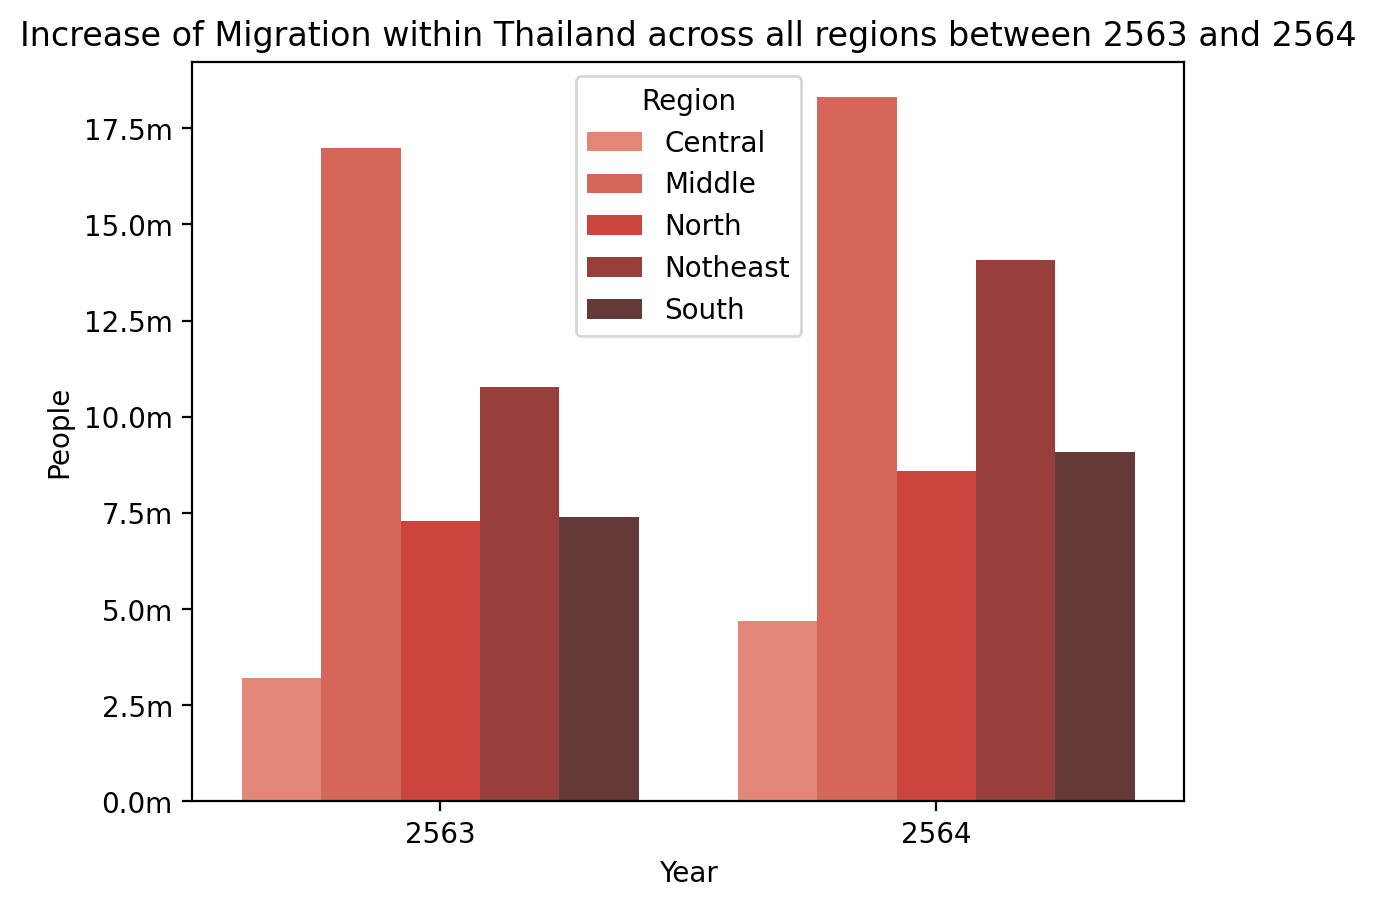

In [73]:
bargraph = sns.barplot(data=reasons_6364, x="Year", y="People", errorbar=None, hue="Region", palette="Reds_d")
bargraph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}m"))
plt.title("Increase of Migration within Thailand across all regions between 2563 and 2564")

In [64]:
regions = reasons_6364['Region'].unique()
region_dropdown = widgets.Dropdown(options=regions, description='Region:')

# Create a function to update the plot based on the selected region
def update_plot(region):
    plt.figure(figsize=(8, 5))  # Adjust width and height as needed
    bargraph = sns.barplot(data=reasons_6364[reasons_6364['Region'] == region], x="Year", y="People", errorbar=None, color=".7")
    bargraph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}m"))
    plt.show()

# Use widgets.interact to automatically generate the dropdown and update the plot
widgets.interact(update_plot, region=region_dropdown)

interactive(children=(Dropdown(description='Region:', options=('Central', 'Middle', 'North', 'Notheast', 'Sout…

<function __main__.update_plot(region)>

In [ ]:
text="""ตารางที่ 2 จำนวนประชากรแฝง จำแนกรายจังหวัด
หน่วย : พันคน 
จังหวัด   ปี   จำนวนประชากรแฝงกลางคืน
กรุงเทพมหานคร    2565    2.708
กรุงเทพมหานคร    2564    2.324
กรุงเทพมหานคร    2563    2.35
กรุงเทพมหานคร    2562    2.27
กรุงเทพมหานคร    2561    2.04
กรุงเทพมหานคร    2560    2.05
"""